# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de fotocasa, el cual es uno de los sitios mas populares de bienes raíces en España. Por favor no hagas estos (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa mas cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

Let's start with precisely that question... Good luck!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [3]:
import pandas as pd

# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds


/tmp/ipykernel_772/4022576448.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


In [4]:
pd.set_option('display.max_columns', None)
print(ds)

       Unnamed: 0  id_realEstates  isNew                    realEstate_name  \
0               1       153771986  False            ferrari 57 inmobiliaria   
1               2       153867863  False  tecnocasa fuenlabrada ferrocarril   
2               3       153430440  False                 look find boadilla   
3               4       152776331  False  tecnocasa fuenlabrada ferrocarril   
4               5       153180188  False            ferrari 57 inmobiliaria   
...           ...             ...    ...                                ...   
15330       15331       153901377  False                infocasa consulting   
15331       15332       150394373  False                inmobiliaria pulpon   
15332       15333       153901397  False             tecnocasa torrelodones   
15333       15334       152607440  False                inmobiliaria pulpon   
15334       15335       153901356  False                infocasa consulting   

       phone_realEstate                            

#### Ejercicio 01. ¿Cuál es la casa mas cara en el todo el dataset? (★☆☆)

Imprime la direccion y el precio de la casa seleccionada. Por ejemplo:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [5]:
# TODO
df = pd.DataFrame(ds)
most_expensive_house = df.loc[df["price"].idxmax()]
print(f'The house with address {most_expensive_house["address"]} is the most expensive and its price is {most_expensive_house["price"]} USD')




The house with address El Escorial is the most expensive and its price is 8500000 USD


#### Ejercicio 02. ¿Cuál es la casa mas barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [6]:
# TODO
cheapest_house = df.loc[df["price"].idxmin()]
print(f'The house with address {cheapest_house["address"]} is the cheapest and its price is {cheapest_house["price"]} USD')

The house with address Parla is the cheapest and its price is 0 USD


In [7]:
# Sin tener en cuenta los valores equivalentes a cero:
cheapest_house = df[df["price"]>0].iloc[df["price"].idxmin()]
print(f'The house with address {cheapest_house["address"]} is the cheapest and its price is {cheapest_house["price"]} USD')

The house with address Calle de Pepe Isbert,  Madrid Capital is the cheapest and its price is 385000 USD


#### Ejercicio 03. ¿Cuál es la casa mas grande y la mas pequeña del dataset? (★☆☆)

Imprime la dirección y el area de las casas seleccionadas. Por ejemplo:

`The bigger house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smaller house is located on County Road 1 N and its surface is 200 meters`

In [8]:
# TODO
bigger_house = df.loc[df["surface"].idxmax()]
smaller_house = df.loc[df["surface"].idxmin()]
print(f'The bigger house is located on {bigger_house["address"]} and its surface is {bigger_house["surface"]} meters', 
      f'The smaller house is located on {smaller_house["address"]} and its surface is {smaller_house["surface"]} meters')

The bigger house is located on Sevilla la Nueva and its surface is 249000.0 meters The smaller house is located on Calle Amparo,  Madrid Capital and its surface is 15.0 meters


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3,...`

In [9]:
# TODO
poblaciones = df["level5"].unique()
poblaciones


array(['Arganda del Rey', 'Fuenlabrada', 'Boadilla del Monte',
       'Las Rozas de Madrid', ' Madrid Capital', 'Villaviciosa de Odón',
       'Pinto', 'Valdemoro', 'Navalcarnero', 'Pozuelo de Alarcón',
       'Torrejón de Ardoz', 'Navalagamella', 'San Sebastián de los Reyes',
       'Rivas-vaciamadrid', 'Alpedrete', 'Móstoles',
       'San Fernando de Henares', 'Coslada', 'Becerril de la Sierra',
       'Alcalá de Henares', 'Chinchón', 'Parla', 'Alcorcón',
       'El Escorial', 'Leganés', 'Pedrezuela', 'Majadahonda',
       'Villanueva de la Cañada', 'Villanueva del Pardillo',
       'Torrelodones', 'Moralzarzal', 'Mejorada del Campo', 'Aranjuez',
       'Corpa', 'Getafe', 'Velilla de San Antonio', 'Sevilla la Nueva',
       'San Martín de la Vega', 'Villalbilla', 'Collado Villalba',
       'Alcobendas', 'El Molar (Madrid)', 'Moraleja de Enmedio', 'Algete',
       'Campo Real', 'Torrejón de la Calzada', 'Colmenar Viejo',
       'Valdemorillo', 'Fuente El Saz de Jarama', 'Tres Cantos',

#### Ejercicio 05. ¿El data set contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`true` o `fase`) seguido de la fila/columna que contiene el NAs.

In [10]:
# TODO
nas = df[df.isin(["NAs"])].any()
nas


Unnamed: 0          False
id_realEstates      False
isNew               False
realEstate_name     False
phone_realEstate    False
url_inmueble        False
rooms               False
bathrooms           False
surface             False
price               False
date                False
description         False
address             False
country             False
level1              False
level2              False
level3              False
level4              False
level5              False
level6              False
level7              False
level8              False
upperLevel          False
countryId           False
level1Id            False
level2Id            False
level3Id            False
level4Id            False
level5Id            False
level6Id            False
level7Id            False
level8Id            False
accuracy            False
latitude            False
longitude           False
zipCode             False
customZone          False
dtype: bool

#### Ejercicio 06. Elimina los NAs del data set, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [11]:
# TODO
nas1 = df.drop(df[df.isin(["NAs"])].index)
nas1

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone


#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido

In [12]:
# TODO
media = df[df["level5"].isin(["Arroyomolinos (Madrid)"])]["price"].mean()
print("{:.2f}".format(media))

294541.60


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


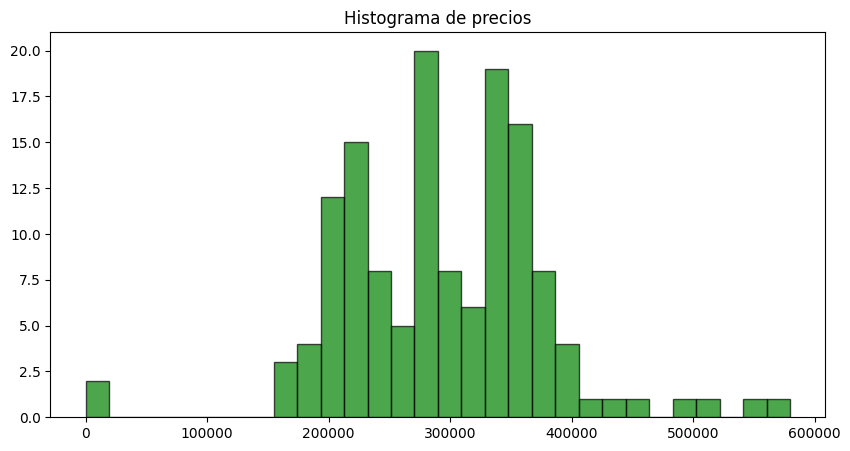

In [13]:
# TODO: Code

import matplotlib.pyplot as plt
pob = df["price"][df["level5"].isin(["Arroyomolinos (Madrid)"])]
plt.figure(figsize = (10, 5))
plt.hist(pob, bins = 30, alpha = 0.7, color = "green", ec="black")
plt.title("Histograma de precios")
plt.show()


El gráfico muestra la distribución de precios para la población de Arroyomolinos (Madrid). En el eje X se muestra la variable que se está midiendo (precio) y el eje Y se muestra la variable de frecuencia. El histograma está dividido en 30 bins (barras), e indica en general que la mayor frecuencia de precios oscila entre los 200.000 y los 400.000 aproximadamente. 

#### Ejercicio 09. ¿ Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedio y escribe una conclusion acerca de ellos

In [14]:
# TODO
media_Valdemorillo = df[df["level5"].isin(["Valdemorillo"])]["price"].mean()
media_Galapagar = df[df["level5"].isin(["Galapagar"])]["price"].mean()
print(f'Valdemorillo={round(media_Valdemorillo)}, Galapagar={round(media_Galapagar)}')

Valdemorillo=363860, Galapagar=360063


La media de precios de ambas poblaciones es diferente, varía en 3 unidades. 

#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (price/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio y escribe una conclusion acerca de ellos.

Pista: Crea una nueva columna llamada `pps` (price per square) y luego analiza los valore.s

In [15]:
df["pps"] = df["price"]/df["surface"]
pps_Valdemorillo = df[df["level5"].isin(["Valdemorillo"])]["pps"].mean()
pps_Galapagar = df[df["level5"].isin(["Galapagar"])]["pps"].mean()
print((f'Valdemorillo={round(pps_Valdemorillo)}$/m2, Galapagar={round(pps_Galapagar)}$/m2'))


Valdemorillo=1318$/m2, Galapagar=1606$/m2


Aunque el promedio de precios es similar, si se analiza el precio/m2 se obtiene que los precios en Galapagar son en promedio más altos que en Valdemorillo.

#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusion al respecto.

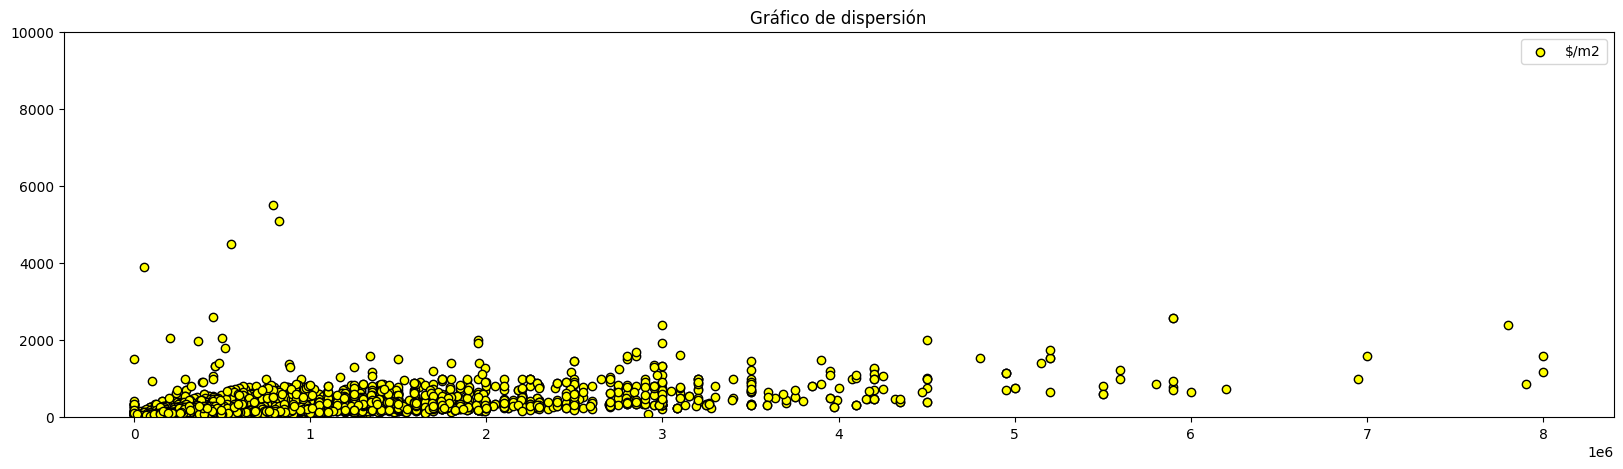

In [16]:
plt.figure(figsize = (20, 5))
plt.scatter(df["price"], df["surface"], label = "$/m2", color="Yellow", ec="Black")
plt.ylim(0, 10000)
plt.title("Gráfico de dispersión")
plt.legend()
plt.show()

En el gráfico se puede observar una relación entre el precio y la superficie de las propiedades, y la leyenda sugiere que podría haber una relación específica con el precio por metro cuadrado. La mayoría de datos se encuentra por debajo de los 300.000, y corresponden con superficies más pequeñas. 

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [17]:
Agencias = len(df["realEstate_name"].unique())
print(f"Hay {Agencias} agencias de bienes raíces")

Hay 1822 agencias de bienes raíces


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [18]:
n_casas= df["level5"].value_counts().max()
poblacion1 = df["level5"].value_counts().idxmax()
print(f'La población con mayor número de casas es {poblacion1} con {n_casas} casas')


La población con mayor número de casas es  Madrid Capital con 6643 casas


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Has un subconjunto del Dataframe original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆)

Pista: Filtra el Dataframe original usando la columna `level5` y la función `isin`

In [19]:
Cinturon_sur = df[df["level5"].isin(["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"])]
Cinturon_sur

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone,pps
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,"""""Agencia inmobiliaria de FUENLABRADA - zona F...","Calle Polvoranca, 6, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,Agencia inmobiliaria de FUENLABRADA - zona Fue...,"Barrio San Andres, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN,1034.883721
85,86,153152077,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000,2019-12-28T18:30:53.960102Z,"¡oportunidad! vivienda de obra nueva, local ad...","Avenida Carabancheles, 18, Alcorcón",España,Madrid,Madrid,Zona Suroeste,"Alcorcón, Zona de",Alcorcón,NaN,Centro,Casco Antiguo,Casco Antiguo,0,0,0,0,0,0,0,0,0,1,"40,35059","-3,82693",NaN,NaN,2140.000000
94,95,153995577,False,viviendas365com,911226014.0,https://www.fotocasa.es/es/comprar/vivienda/le...,3.0,2.0,120.0,320000,2019-12-28T18:30:53.960102Z,VIVIENDAS365-VENDE- Hermosa Vivienda en el Bar...,"Avenida Los Pinos, Leganés",España,Madrid,Madrid,Zona Sur de Madrid,"Leganés, Zona de",Leganés,NaN,Valdepelayo - Montepinos - Arroyo Culebro,NaN,Valdepelayo - Montepinos - Arroyo Culebro,0,0,0,0,0,0,0,0,0,0,"40,31933","-3,77574",NaN,NaN,2666.666667
109,110,153586414,False,area uno asesores inmobiliarios,912664081.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,142.0,425000,2019-12-28T18:32:32.5337942Z,AREA UNO asesores inmobiliarios oficina de las...,Alcorcón,España,Madrid,Madrid,Zona Suroeste,"Alcorcón, Zona de",Alcorcón,NaN,Prado Santo Domingo - Ensanche,NaN,Prado Santo Domingo - Ensanche,0,0,0,0,0,0,0,0,0,0,"40,3313411","-3,8313868",NaN,NaN,2992.957746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,15276,153903887,False,aliseda servicios de gestion inmobiliaria,911368198.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,1.0,78.0,138000,2019-12-17T19:02:00Z,"Piso en Fuenlabrada, Madrid. Dispone de una su...","Urbanización Urbanización Parque Miraflores, 5...",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Loranca,NaN,Loranca,0,0,0,0,0,0,0,0,0,1,"40,31381","-3,83733",NaN,NaN,1769.230769
15291,15292,151697757,False,unipiso,912788631.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,2.0,110.0,279000,2019-12-17T18:57:00Z,"QUIERES VIVIR EN PLENO CENTRO, a tan sólo 2 m...",Leganés,España,Madrid,Madrid,Zona Sur de Madrid,"Leganés, Zona de",Leganés,NaN,Centro de Leganés,NaN,Centro de Leganés,0,0,0,0,0,0,0,0,0,0,"40,3259051","-3,76318",NaN,NaN,2536.363636
15305,15306,153902389,False,jadein ferrero,914871639.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,85.0,170000,2019-12-17T18:43:00Z,JADEIN FERRERO S.L vende excelente vivienda en...,Fuenlabrada,España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Fuenlabrada II - El Molino,NaN,Fuenlabrada II - El Molino,0,0,0,0,0,0,0,0,0,0,"40,2882193","-3,8098617",NaN,NaN,2000.000000
15322,15323,153871864,False,gestion comercial,911220662.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,91.0,112000,2019-12-17T18:25:00Z,´´´´´´´´´´´´´´´´´´´´´´´´´

#### Ejercicio 15. Traza un gráfico de barra de la media de los precios y explica lo que observas (debes usar el subconjunto obtenido de la pregunta 14) (★★★)

Imprima un gráfico de barra de la media de precios y escriba en la celda Markdown un breve análisis del sector.

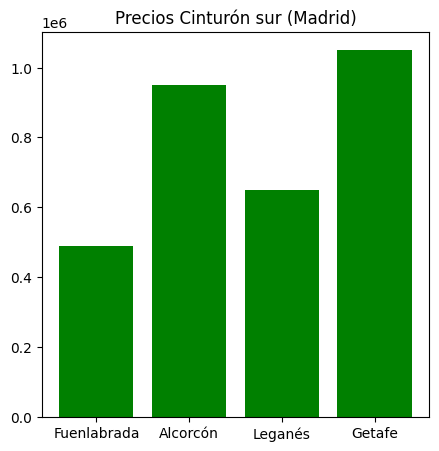

In [20]:
plt.figure(figsize = (5, 5))

plt.bar(Cinturon_sur["level5"], Cinturon_sur["price"], color="Green")

plt.title("Precios Cinturón sur (Madrid)")
plt.show()

**TODO: Markdown**. Para escribir aquí, has doble click en esta celda, elimina este contenido y coloca en su lugar el texto que quieres escribir. Luego, ejecuta la celda.

#### Ejercicio 16. Calcula la media y la varianza dela muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Imprime ambos valores por  cada variable.

In [21]:
media_precio = Cinturon_sur["price"].mean()
media_habitaciones = Cinturon_sur["rooms"].mean()
media_superficie = Cinturon_sur["surface"].mean()
media_baths = Cinturon_sur["bathrooms"].mean()

varianza_precio = Cinturon_sur["price"].var()
varianza_habitaciones = Cinturon_sur["rooms"].var()
varianza_superficie = Cinturon_sur["surface"].var()
varianza_baths = Cinturon_sur["bathrooms"].var()

print(f"MEDIAS CINTURON SUR MADIRD: Precio: {media_precio}, Habitaciones: {media_habitaciones}, Superficie: {media_superficie}, Baños: {media_baths},    VARIANZAS CINTURON SUR MADIRD: Precio: {varianza_precio}, Habitaciones: {varianza_habitaciones}, Superficie: {varianza_superficie}, Baños: {varianza_baths}")

MEDIAS CINTURON SUR MADIRD: Precio: 223094.48070562293, Habitaciones: 3.0177383592017737, Superficie: 111.75222363405337, Baños: 1.633221850613155,    VARIANZAS CINTURON SUR MADIRD: Precio: 14921367508.04902, Habitaciones: 0.7188858892927542, Superficie: 4263.051760316337, Baños: 0.5717968625577321


#### Exercise 17. What is the most expensive house of each population? You must use the subset obtained in the question 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population

In [22]:
expensive_house = Cinturon_sur.loc[Cinturon_sur.groupby('level5')['price'].idxmax()]
expensive_house

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone,pps
5585,5586,153275915,False,100 home red inmobiliaria,912669623.0,https://www.fotocasa.es/es/comprar/vivienda/ca...,6.0,6.0,722.0,950000,2019-12-26T11:01:00Z,100% HOME RED INMOBILIARIA DE MOSTOLES VENDE M...,Alcorcón,España,Madrid,Madrid,Zona Suroeste,"Alcorcón, Zona de",Alcorcón,NaN,Campodón - Ventorro del Cano,NaN,Campodón - Ventorro del Cano,0,0,0,0,0,0,0,0,0,0,"40,3535169","-3,8664683",NaN,NaN,1315.789474
11561,11562,153660921,False,unna madrid,912780846.0,https://www.fotocasa.es/es/comprar/vivienda/va...,4.0,3.0,274.0,490000,2019-12-20T10:31:00Z,INTERHABITAT vende impresionante chalet unifam...,"Calle de Paulo Freire, 5, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Universidad - Hospital en Fuenlabrada,NaN,Universidad - Hospital en Fuenlabrada,0,0,0,0,0,0,0,0,0,1,"40,28286","-3,81475",NaN,NaN,1788.321168
2881,2882,151105544,False,unna grupo inmobiliario,912665694.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,6.0,4.0,600.0,1050000,2019-12-27T15:59:00Z,"Edificio residencial, único en toda la zona su...",Getafe,España,Madrid,Madrid,Zona Sur de Madrid,"Getafe, Zona de",Getafe,NaN,San Isidro,NaN,San Isidro,0,0,0,0,0,0,0,0,0,0,"40,302820239187","-3,7281704612835",NaN,NaN,1750.000000
10412,10413,152251506,False,bafre gestion y servicios inmobiliarios,910752245.0,https://www.fotocasa.es/es/comprar/vivienda/co...,6.0,5.0,360.0,650000,2019-12-21T16:00:00Z,Estupendo chalet pareado de lujo en venta en L...,"Avenida Reina Sofía, Leganés",España,Madrid,Madrid,Zona Sur de Madrid,"Leganés, Zona de",Leganés,NaN,Leganés Norte,NaN,Leganés Norte,0,0,0,0,0,0,0,0,0,0,"40,3423636291504","-3,74814414978027",NaN,NaN,1805.555556


#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in the question 14) (★★★)

For the normalization method you can use the one you consider to, there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot

Hint: You can help yourself reviewing the multihist demo of Matplotlib

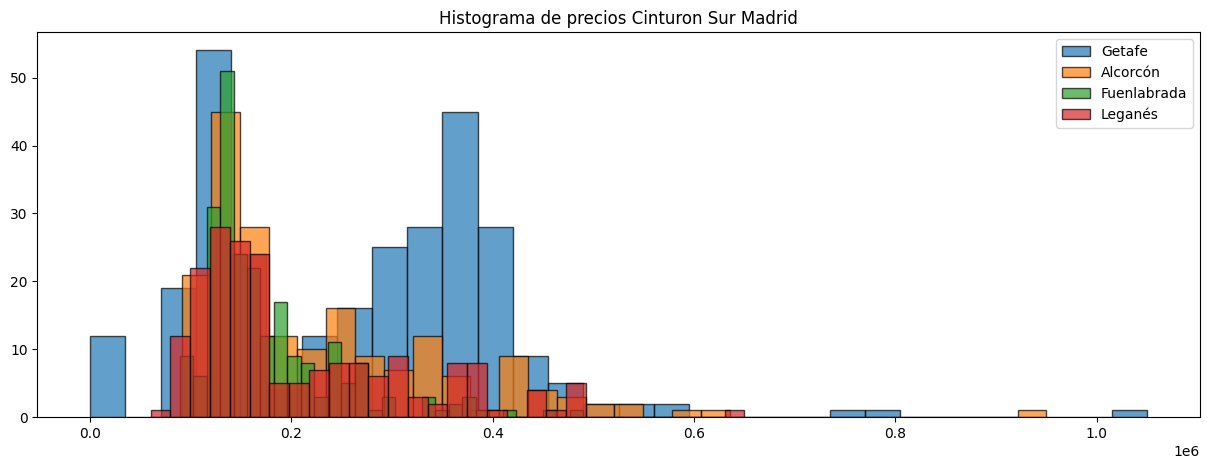

In [23]:
plt.figure(figsize = (15, 5))
Getafe = Cinturon_sur["price"][Cinturon_sur["level5"].isin(["Getafe"])]
Alcorcon = Cinturon_sur["price"][Cinturon_sur["level5"].isin(["Alcorcón"])]
Fuenlabrada = Cinturon_sur["price"][Cinturon_sur["level5"].isin(["Fuenlabrada"])]
Leganes = Cinturon_sur["price"][Cinturon_sur["level5"].isin(["Leganés"])]

plt.hist(Getafe, bins = 30, alpha = 0.7, ec="Black", label = "Getafe")
plt.hist(Alcorcon, bins = 30, alpha = 0.7, ec="Black", label = "Alcorcón")
plt.hist(Fuenlabrada, bins = 30, alpha = 0.7, ec="Black", label = "Fuenlabrada")
plt.hist(Leganes, bins = 30, alpha = 0.7, ec="Black", label = "Leganés")

plt.title("Histograma de precios Cinturon Sur Madrid")
plt.legend()
plt.show()

**TODO: Markdown**. To write here, double click to this cell and just remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in the question 14 (★★☆)

Hint: Create a new column called `pps` (price per square) and then analyse the values

In [24]:
print(expensive_house[["level5", "pps"]])

            level5          pps
5585      Alcorcón  1315.789474
11561  Fuenlabrada  1788.321168
2881        Getafe  1750.000000
10412      Leganés  1805.555556


#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph? You must use the subset obtained in the question 14 (★★☆) 
Hint: make a scatter plot of each population using subplots.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


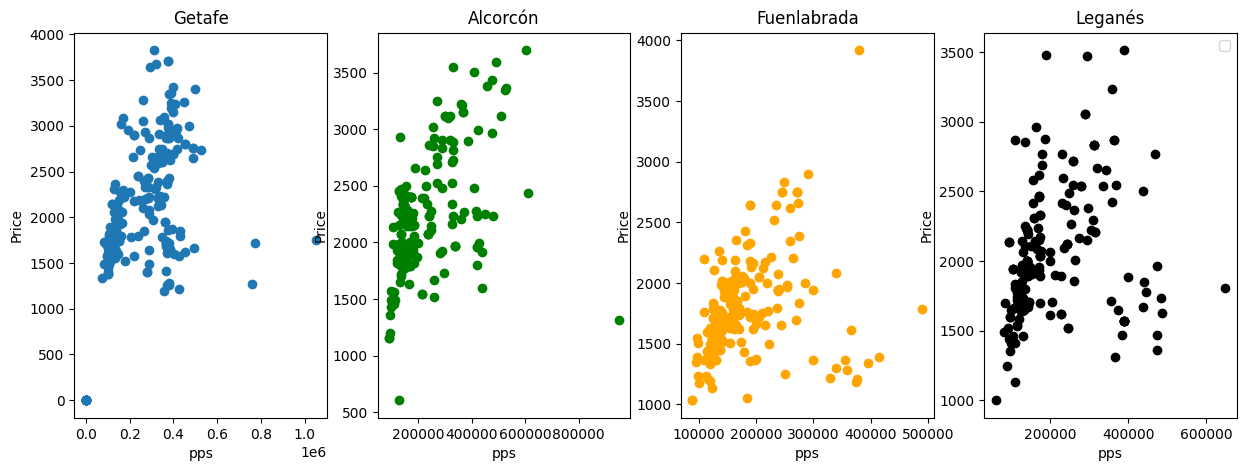

In [49]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
Getafe_data = Cinturon_sur[Cinturon_sur["level5"].isin(["Getafe"])]
axs[0].scatter(Getafe_data["price"], Getafe_data["pps"])
axs[0].set_title('Getafe')
axs[0].set_xlabel('pps')
axs[0].set_ylabel('Price')

Alcorcon_data = Cinturon_sur[Cinturon_sur["level5"].isin(["Alcorcón"])]
axs[1].scatter(Alcorcon_data["price"], Alcorcon_data["pps"], color="Green")
axs[1].set_title('Alcorcón')
axs[1].set_xlabel('pps')
axs[1].set_ylabel('Price')

Fuenlabrada_data = Cinturon_sur[Cinturon_sur['level5'] == 'Fuenlabrada']
axs[2].scatter(Fuenlabrada_data["price"], Fuenlabrada_data["pps"], color="Orange")
axs[2].set_title('Fuenlabrada')
axs[2].set_xlabel('pps')
axs[2].set_ylabel('Price')

Leganes_data = Cinturon_sur[Cinturon_sur['level5'] == 'Leganés']
axs[3].scatter(Leganes_data["price"], Leganes_data["pps"], color="Black")
axs[3].set_title('Leganés')
axs[3].set_xlabel('pps')
axs[3].set_ylabel('Price')


plt.legend()
plt.show()


#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón ur de Madrid por color d cada población (debes usar el subconjunto obtenido en la pregunta 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar u código simple que transforme las columnas de coordenadas en un diccionario de python (agrega más información si es necesario) y agrégala al mapa.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


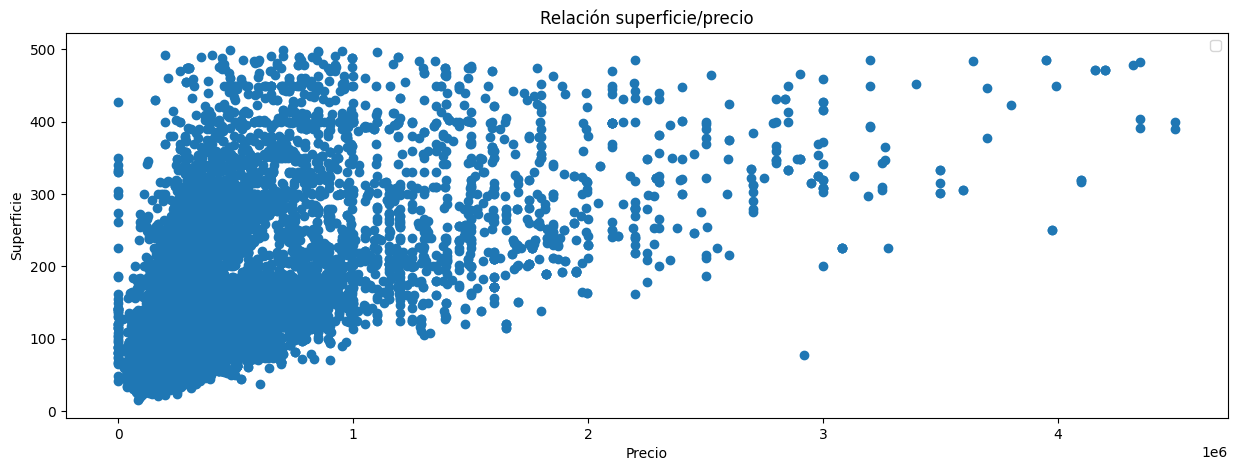

In [61]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
filtered_houses = df[df["surface"] < 500]
axs.scatter(filtered_houses["price"], filtered_houses["surface"])
axs.set_title('Relación superficie/precio')
axs.set_xlabel('Precio')
axs.set_ylabel('Superficie')

plt.legend()
plt.show()

In [ ]:
## Aquí: traza la coordenadas de los estados

## PON TU CÓDIGO AQUÍ:
